# Shopping Customer segmentation - (Unsupervised ML project)

### Problem statement:
- understand the target customers and plan a marketing strategy
- identify the most important shopping groups based on annual income, age, gender, and their shopping score
- identify the ideal number of groups and labeling them


### Project approach:
- EDA (Exploratory Data Analysis)
- Utitlize KMeans clustering algorithm
- from the created clusters use Summary Statistics


In [1]:
# Import libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

### 1. Univariate Analysis
    - it focuses only on describing and summarizing the distribution of single variable

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


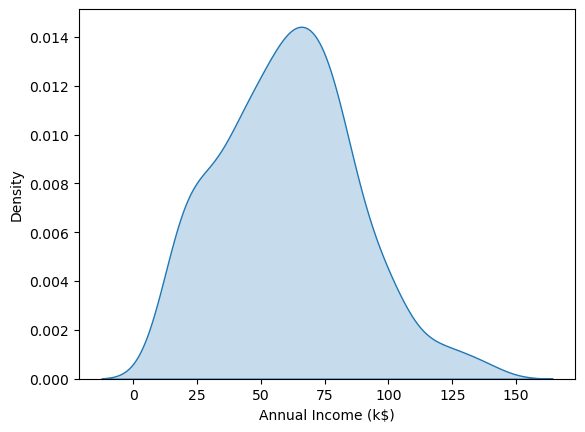

In [6]:
sns.kdeplot(data=df, x='Annual Income (k$)', fill=True);

The KDE plot shows a smoothed pdf of annual income with a single peak which most individuals fall in that specific range

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

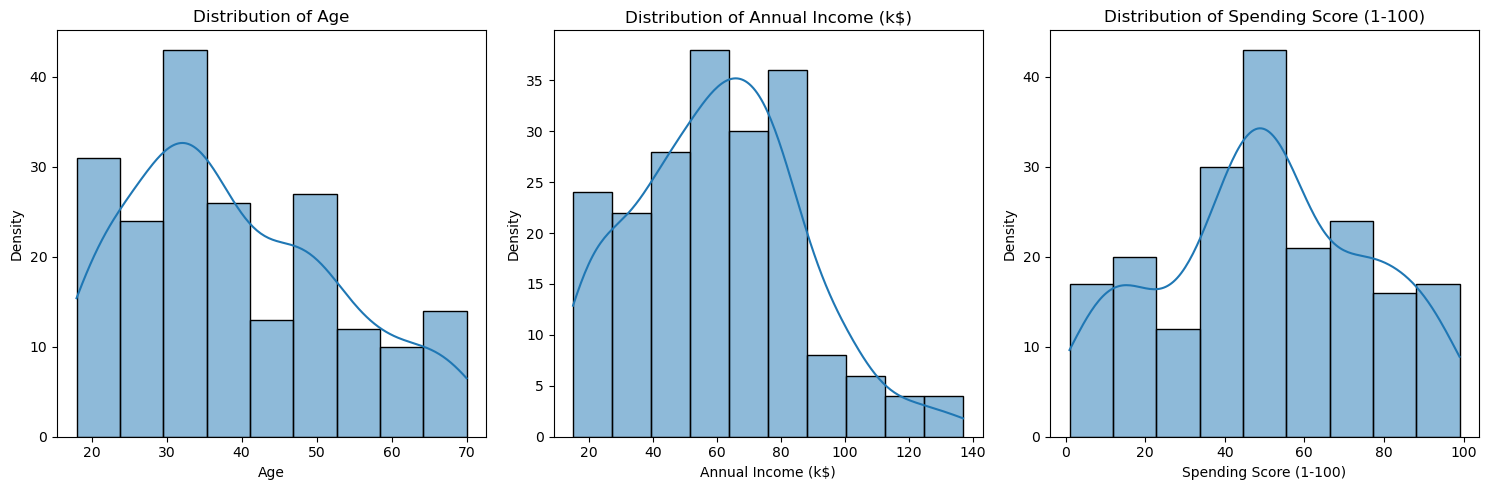

In [8]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# create subplots to vizualise in a horizontal way
fig, axes = plt.subplots(1, len(columns), figsize=(15,5))

# enumerate(columns) pairs each column name with its position(i) in the list
for i, col in enumerate(columns):
    
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# adjust spacing between figures
plt.tight_layout()
plt.show()

1. Distribution of Age:
    - it's roughly distributed with a peak for people aged around 30-50 years.
    - There're also some slightly peaks around 20 and 40 years, indicating other age clusters
    
2. Distribution of Annual Income (in $k):
    - The income is right skewed where few people has higher annual income.

3. Distribution of spending score:
    - The distribution is relatively uniform, where most customers have a moderate spending habits.
    

> Marketing strategies could target the 30-35 age group, as they are the most common customers.
Also, High-income individuals (80k+) might be valuable for premium services.

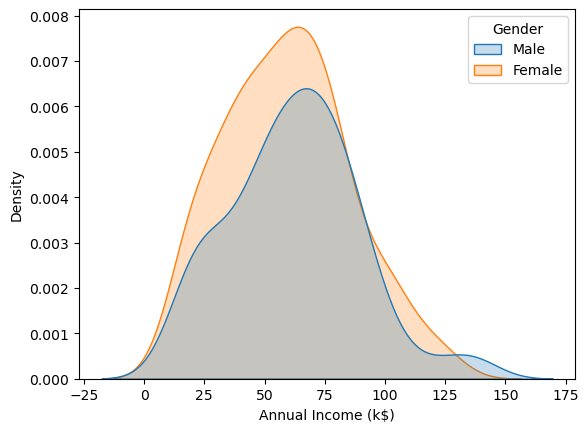

In [9]:
sns.kdeplot(data=df, x=df['Annual Income (k$)'], shade=True, hue=df['Gender']);
#df.dtypes

In [10]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

- we can see clearly that 'Females' portion is more frequent than that of 'Males'.
- Also there is an outlier in the 'Male' as it has a right thick tail with a distribution skewed to the right.

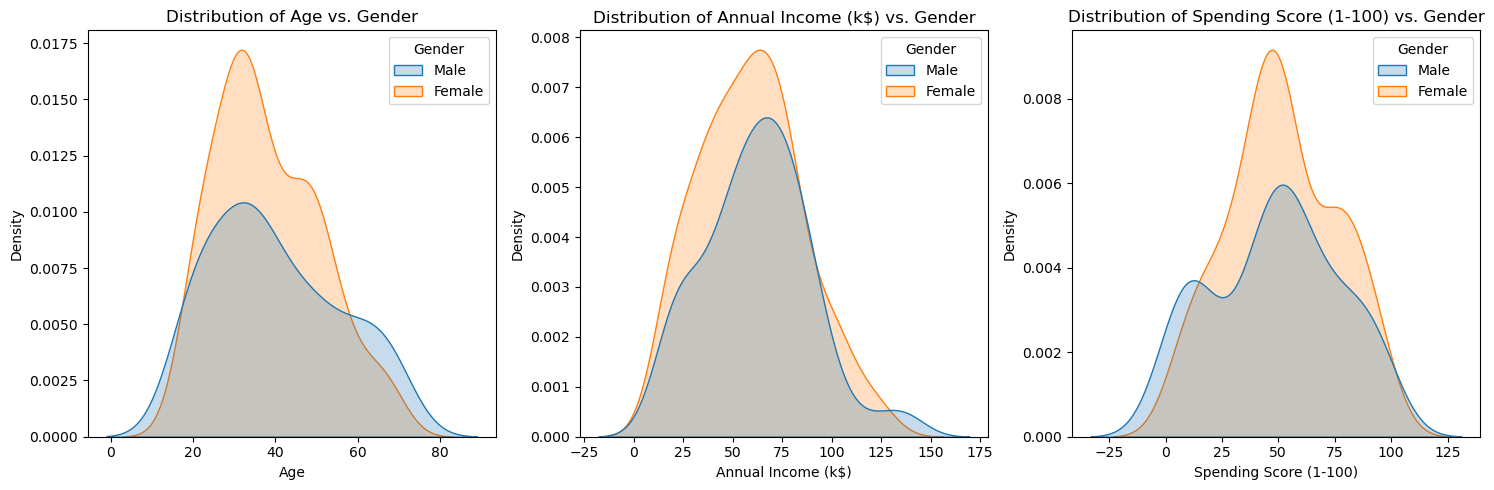

In [11]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# create subplots to vizualise in a horizontal way
fig, axes = plt.subplots(1, len(columns), figsize=(15,5))

# enumerate(columns) pairs each column name with its position(i) in the list
for i, col in enumerate(columns):
    
    sns.kdeplot(data=df, x=col, fill=True, hue=df['Gender'], ax= axes[i]);    
    axes[i].set_title(f'Distribution of {col} vs. Gender')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# adjust spacing between figures
plt.tight_layout()
plt.show()

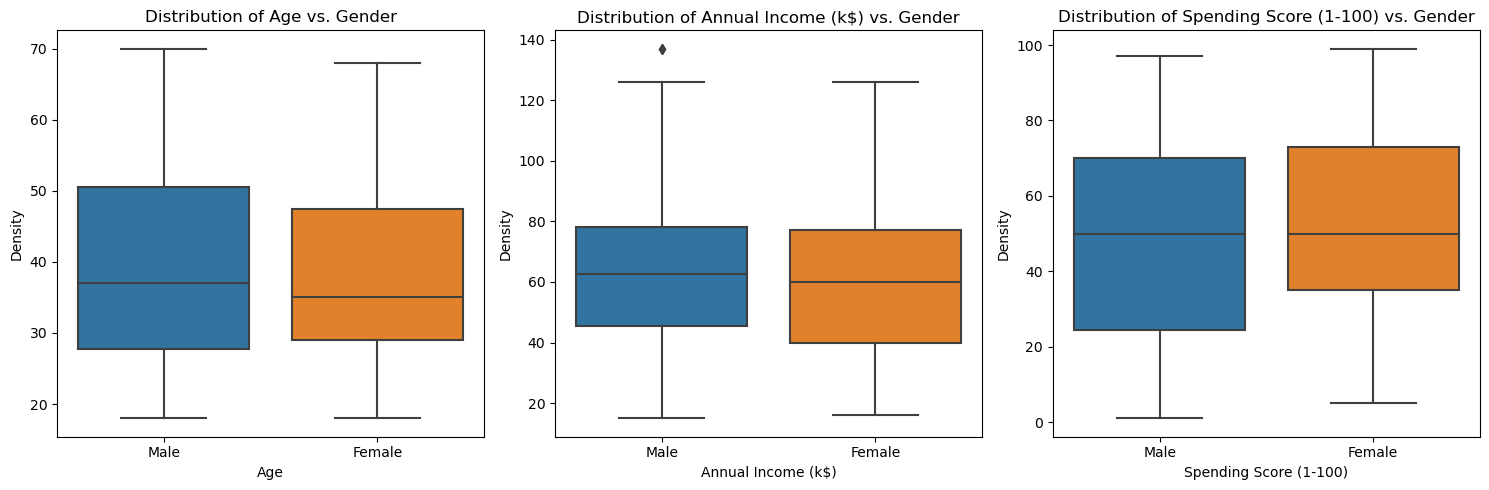

In [12]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# create subplots to vizualise in a horizontal way
fig, axes = plt.subplots(1, len(columns), figsize=(15,5))

# enumerate(columns) pairs each column name with its position(i) in the list
for i, col in enumerate(columns):
    
    # in x-axis we want 'Gender' to separate everything
    # for y-axis is "where our boxplot is going to exist", we want each numerical variables in our list
    sns.boxplot(data=df, x='Gender' ,y=df[col], ax= axes[i]);    
    axes[i].set_title(f'Distribution of {col} vs. Gender')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# adjust spacing between figures
plt.tight_layout()
plt.show()

1. for 'Age':
    - Males is more distributed and has slighly higher median than Females.
    - Male ages are higher in range than females, where men's ages are between 30-50 

2. for 'Annual Income':
    - As we saw in the kernel density estimate (KDE) plot there is just 1 outlier in males that gave us the thick tail, So it'll affect the position of the median. 

### 2. Bivariate Analysis

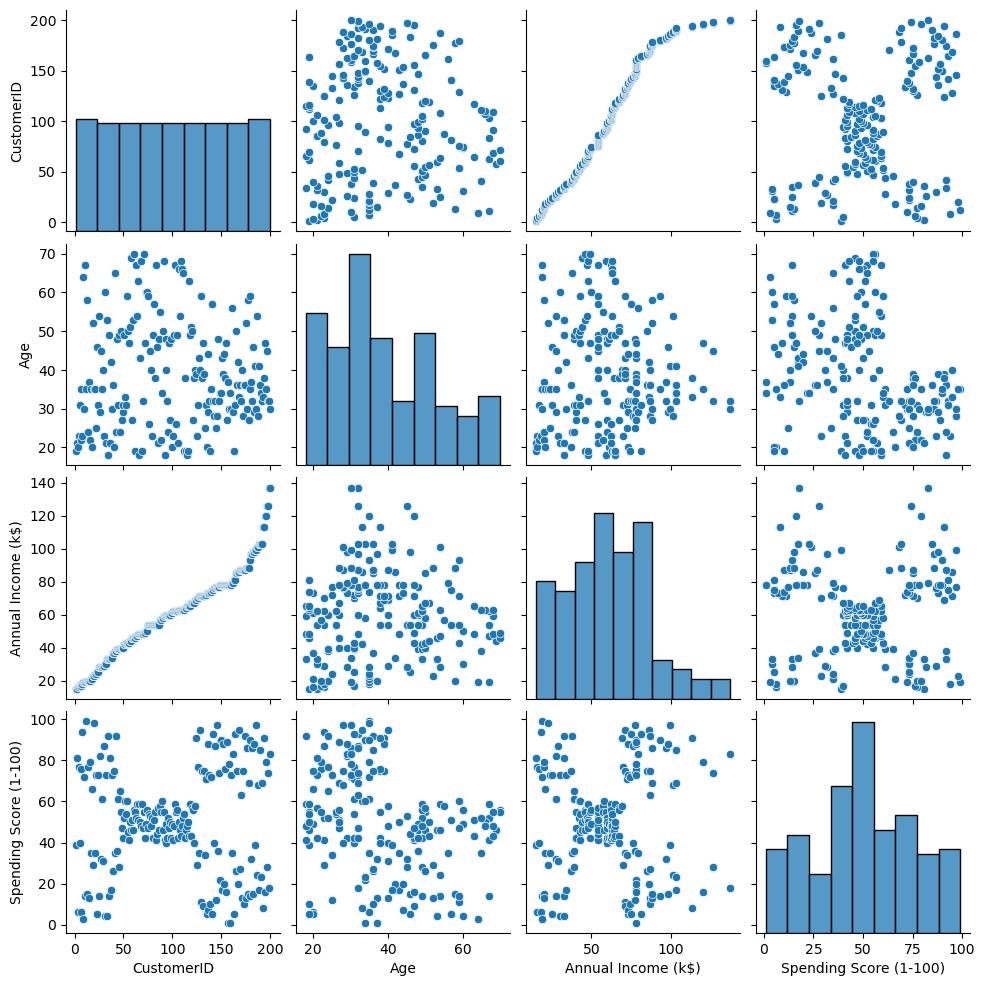

In [13]:
sns.pairplot(df);

#### Reasons why we want to drop customer id:
    - 'CustomerId' is a unique identifier, and it doesn't carry meaningful informations about customer behaviour or preferences. 
    - The points related to CustomerId are scattered randomly with no clear trend
    - while there might be a visual relation between 'CustomerId' and 'Annual Income', this relation could be coincidental.
    - also, it doesn't provide predictive effect for 'Annual Income'

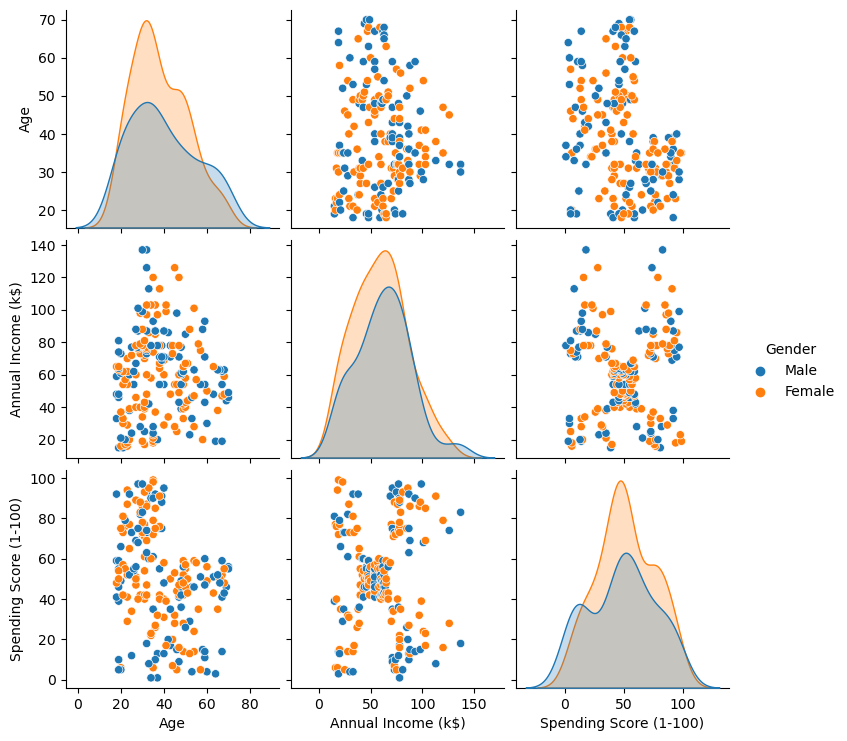

In [14]:
df = df.drop('CustomerID', axis=1)  #-->   axis: (0 for rows) & (1 for columns)
sns.pairplot(df, hue='Gender')

In [15]:
# What is the mean value for our data based on gender
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


for Age and Annual Income:
    - both genders are pretty similar
 but for Spending Score:
     - females are higher

In [16]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [17]:
numeric_cols = df.select_dtypes(include='int64')
numeric_cols.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

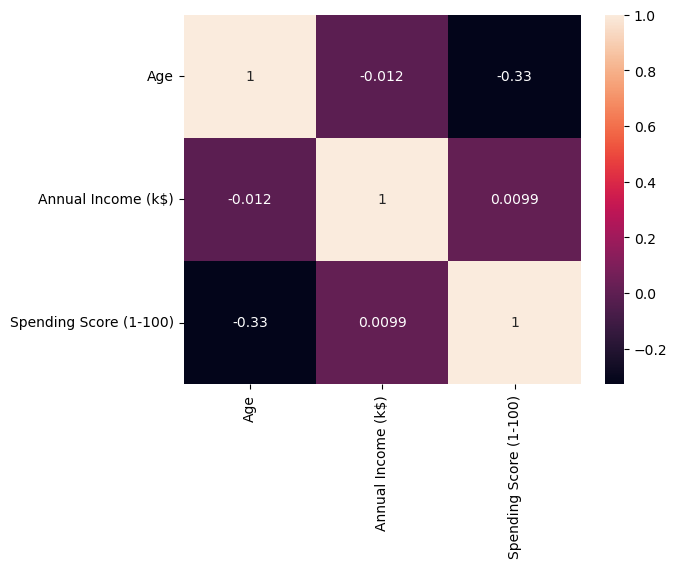

In [18]:
sns.heatmap(numeric_cols.corr(), annot=True)

# Clustering: Univariate, Bivariate, Multi-variate

### k-Means is an unsupervised machine learning algorithm 
   - what that means is: that we're not trying to predict something instead we're feeding some data into the algorithm to find interesting patterns in the data set
   - it's an interative algorithm which go through multiple iterations to update the algorithm and find our final clusters that we need
   - used for clustering data points into distinct groups (clusters) based on their similarity and the features supplied to it.
   - it aims to find natural groupings within the data provided without any labeling by reducing or minimzing the sum of distances between the center of the cluster and data points
   - there're a number of clustering methods available such as:
    1. dbscan
    2. gaussian mixture modelling
    3. K-means

### Steps to run a k-means clustering:
1. specify the no.of clusters (`k`)
2. randomly initialize the `centroid` for each cluster. (centoiod is the center data point of a cluster)
3. determine which data points belong to which cluster by finding closest centroid to each data point with calculating Euclidean distance.
4. update the centroids based on the `geometric mean` of all data points in the cluster.
5. run steps 3 & 4 until the centroids stop changing and the algorithm has converged towards a stable clusters.

## 1. Univariate clustering

In [19]:
cluster1 = KMeans(n_clusters=3)

In [20]:
cluster1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

##### The fit() method in k-means is responsible for:
1. 'Specify the no. of clusters (k)
    - the fit() method takes the values of 'Annual Income' as input and prepare them to create clusters
    
2. Initialize random centroids 
    - k-means randomly select k data points as the initial centers for the cluster

3. Determine the data points' clusters:
    - by calculating the distance between each data point and the centroids, where each data point is assigned to the closest centroid's cluster.
    
4. update centroids
    - by calculating the geometric mean of all data points in each cluster, the centroids will adjust their position
    
5. repeat steps 3 & 4
    - the centroids will keep changing positions until they reach the best arrangement

In [21]:
# looking at the clusters' labels
cluster1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
# compare the clusters' labels to our initial dataframe or table
# by adding the cluster labels to the table
df['Income cluster'] = cluster1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


#### How many customers fall in each cluster

In [23]:
df['Income cluster'].value_counts()

Income cluster
0    92
1    86
2    22
Name: count, dtype: int64

In [24]:
# Inertia : is the center between centroids
cluster1.inertia_

25341.28587186322

In [25]:
inertia_Scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_Scores.append(kmeans.inertia_)

In [26]:
inertia_Scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5503.407059314954,
 4151.620028011204,
 3816.1391714580573,
 2389.8189894900424,
 1911.5463849016483]

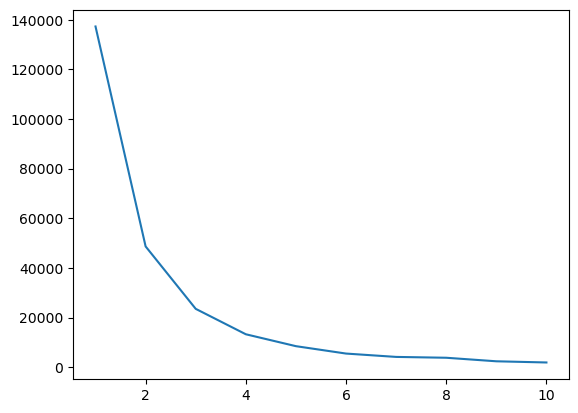

In [27]:
# using the elbow method, no. of clusters will be (k=3)
plt.plot(range(1,11), inertia_Scores)

In [28]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster'],
      dtype='object')

In [29]:
# what the mean values are for 'age', ''
df.groupby('Income cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,38.065217,71.804348,49.880435
1,40.023256,36.348837,50.081395
2,37.545455,108.181818,52.000000


## 2. Bivariate clustering

In [30]:
cluster2 = KMeans(n_clusters=5)
cluster2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income cluster']= cluster2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


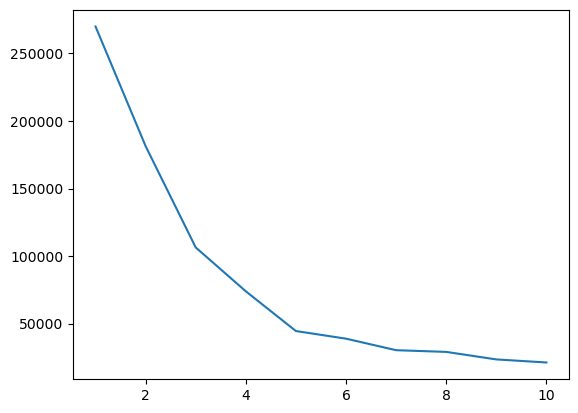

In [31]:
inertia_Scores2 = []

for i in range(1,11):
    kmeans2 = KMeans(n_clusters= i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_Scores2.append(kmeans2.inertia_)

plt.plot(range(1,11), inertia_Scores2)

In [32]:
centers = pd.DataFrame(cluster2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

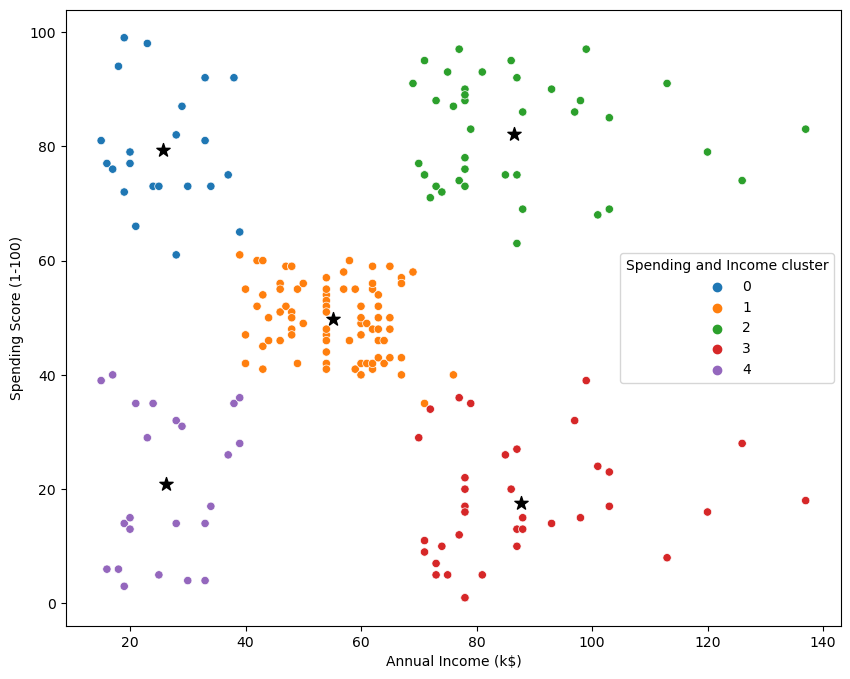

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income cluster', palette='tab10')

### Target Cluster
- target cluster would be cluster 1 which has a high spending score and high annual income.
- approxiamtley 54% of females in cluster 1 shoppers are females. we should look for ways to attract more of them using a marketing campaign targeting popular items in this cluster.
- cluster 4 has a potential in sales. so we should make an event on popular items purchased by them.

In [34]:
# calculate a frequency table for genders
pd.crosstab(df['Spending and Income cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income cluster,,
0,0.590909,0.409091
1,0.587500,0.412500
2,0.538462,0.461538
3,0.472222,0.527778
4,0.608696,0.391304


- females dominates almost all clusters in spending and income

In [35]:
df.groupby('Spending and Income cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,25.272727,25.727273,79.363636
1,42.937500,55.087500,49.712500
2,32.692308,86.538462,82.128205
3,40.666667,87.750000,17.583333
4,45.217391,26.304348,20.913043


- cluster 4 has the lowest age: where their annual income is low but spending is high

- cluster 1 is our ideal cluster: those customers is high in both annual income & spending score, so they will increase our sales

## 3. Multivariate clustering

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scale = StandardScaler()

In [38]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


- we just want these columns (Gender, Age, Annual Income, Spending Score)
- however 'gender' is non numeric with one hot encoding

In [39]:
# one hot encoding for gender
# Each variable is converted in as many 0/1 variables
new_df = pd.get_dummies(data = df,drop_first=True, dtype=int)   #--1 for males 
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income cluster,Gender_Male
0,19,15,39,1,4,1
1,21,15,81,1,0,1
2,20,16,6,1,4,0
3,23,16,77,1,0,0
4,31,17,40,1,4,0


In [40]:
new_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income cluster',
       'Spending and Income cluster', 'Gender_Male'],
      dtype='object')

In [41]:
new_df = new_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [42]:
new_df = pd.DataFrame(scale.fit_transform(new_df))

In [43]:
new_df

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


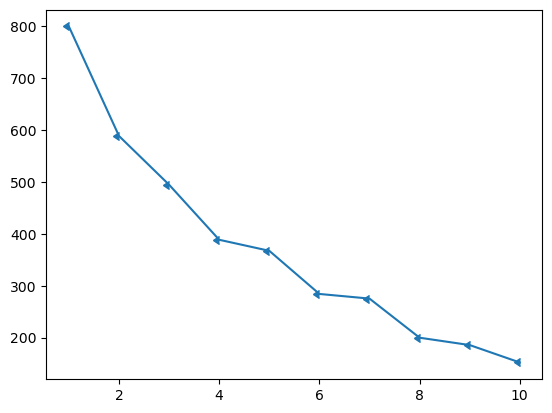

In [45]:
inertia_Scores3 = []

for i in range(1,11):
    kmeans3 = KMeans(n_clusters= i)
    kmeans3.fit(new_df)
    inertia_Scores3.append(kmeans3.inertia_)

plt.plot(range(1,11), inertia_Scores3, marker=8)